In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 300
generations = int(1500/necoc)
generations

5

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

137


In [7]:
len(number_codes[0])

300

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48034 stdev: 0.09503
Best fitness: 0.77242 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.287
Mean genetic distance 2.938, standard deviation 0.512
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 20.912 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54006 stdev: 0.09296
Best fitness: 0.77242 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.314
Mean genetic distance 3.028, standard deviation 0.535
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 21.967 sec (21.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56249 stdev: 0.10101
Best fitness: 0.84354 - size: (3, 14) - species 22 - id 516
Average adjusted fitness: 0.315
Mean genetic distance 3.024, standard deviation 0.532
Population of 200 members in 25 species
Total extin

Mean genetic distance 3.099, standard deviation 0.496
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 29.868 sec (28.023 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66994 stdev: 0.10620
Best fitness: 0.81694 - size: (4, 17) - species 1 - id 809
Average adjusted fitness: 0.382
Mean genetic distance 3.109, standard deviation 0.486
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 29.990 sec (28.416 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49986 stdev: 0.05440
Best fitness: 0.68089 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.167
Mean genetic distance 2.889, standard deviation 0.440
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 25.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52816 stdev: 0.06087
Best fitness: 0.72604 - size: (2, 14)

Population's average fitness: 0.55504 stdev: 0.07172
Best fitness: 0.72542 - size: (2, 14) - species 5 - id 346
Average adjusted fitness: 0.206
Mean genetic distance 3.120, standard deviation 0.497
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 33.017 sec (28.987 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55688 stdev: 0.08148
Best fitness: 0.74644 - size: (3, 15) - species 31 - id 680
Average adjusted fitness: 0.290
Mean genetic distance 3.107, standard deviation 0.491
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 30.627 sec (29.397 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57405 stdev: 0.07382
Best fitness: 0.74644 - size: (3, 15) - species 31 - id 680
Average adjusted fitness: 0.216
Mean genetic distance 3.147, standard deviation 0.487
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 30.697 sec (29.657 average)
number o

Population's average fitness: 0.53512 stdev: 0.07895
Best fitness: 0.72789 - size: (3, 15) - species 4 - id 292
Average adjusted fitness: 0.216
Mean genetic distance 2.986, standard deviation 0.476
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.903 sec (26.112 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55332 stdev: 0.08222
Best fitness: 0.75263 - size: (4, 17) - species 4 - id 543
Average adjusted fitness: 0.198
Mean genetic distance 3.000, standard deviation 0.461
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 28.272 sec (26.832 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56804 stdev: 0.08273
Best fitness: 0.75263 - size: (4, 17) - species 7 - id 543
Average adjusted fitness: 0.211
Mean genetic distance 3.002, standard deviation 0.441
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 29.482 sec (27.494 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.43115 stdev: 0.27159
Best fitness: 0.90043 - size: (2, 13) - species 1 - id 115
Average adjusted fitness: 0.351
Mean genetic distance 2.839, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.151 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64329 stdev: 0.26250
Best fitness: 0.90724 - size: (2, 14) - species 5 - id 329
Average adjusted fitness: 0.568
Mean genetic distance 2.978, standard deviation 0.496
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.244 sec (21.698 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71507 stdev: 0.24661
Best fitness: 0.90724 - size: (2, 14) - species 20 - id 329
Average adjusted fitness: 0.616
Mean genetic distance 2.978, standard deviation 0.495
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 23.229 sec (22.

Population's average fitness: 0.69331 stdev: 0.17914
Best fitness: 0.89177 - size: (3, 14) - species 13 - id 688
Average adjusted fitness: 0.474
Mean genetic distance 2.896, standard deviation 0.471
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 24.213 sec (22.333 average)
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49904 stdev: 0.05362
Best fitness: 0.70501 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.160
Mean genetic distance 2.890, standard deviation 0.456
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.240 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52307 stdev: 0.05642
Best fitness: 0.70501 - size: (2, 13) - species 4 - id 4
Average adjusted fitness: 0.124
Mean genetic distance 2.982, standard deviation 0.444
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.889 sec (21.0

Population's average fitness: 0.56946 stdev: 0.08342
Best fitness: 0.72665 - size: (3, 13) - species 27 - id 654
Average adjusted fitness: 0.205
Mean genetic distance 3.120, standard deviation 0.464
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 23.418 sec (21.940 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57382 stdev: 0.08757
Best fitness: 0.72665 - size: (3, 13) - species 37 - id 654
Average adjusted fitness: 0.238
Mean genetic distance 3.123, standard deviation 0.480
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 23.662 sec (22.285 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50297 stdev: 0.05749
Best fitness: 0.72480 - size: (2, 13) - species 6 - id 160
Average adjusted fitness: 0.195
Mean genetic distance 2.864, standard deviation 0.463
Population of 200 members in 20 species
Total extinctions: 0
Generation 

Population's average fitness: 0.54773 stdev: 0.06739
Best fitness: 0.74088 - size: (3, 16) - species 2 - id 515
Average adjusted fitness: 0.200
Mean genetic distance 3.007, standard deviation 0.466
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 22.179 sec (21.744 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55426 stdev: 0.07180
Best fitness: 0.74088 - size: (3, 16) - species 2 - id 515
Average adjusted fitness: 0.163
Mean genetic distance 3.040, standard deviation 0.473
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 23.726 sec (22.239 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56339 stdev: 0.06935
Best fitness: 0.74088 - size: (3, 16) - species 2 - id 515
Average adjusted fitness: 0.240
Mean genetic distance 3.097, standard deviation 0.477
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 23.669 sec (22.525 average)
number of 

Population's average fitness: 0.52802 stdev: 0.08595
Best fitness: 0.68769 - size: (3, 15) - species 5 - id 333
Average adjusted fitness: 0.266
Mean genetic distance 2.995, standard deviation 0.480
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 22.522 sec (22.212 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55296 stdev: 0.08532
Best fitness: 0.70130 - size: (3, 16) - species 6 - id 464
Average adjusted fitness: 0.252
Mean genetic distance 3.036, standard deviation 0.487
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 23.144 sec (22.523 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56226 stdev: 0.08857
Best fitness: 0.71923 - size: (4, 18) - species 11 - id 671
Average adjusted fitness: 0.249
Mean genetic distance 3.060, standard deviation 0.483
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 23.299 sec (22.717 average)

 ****** 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51323 stdev: 0.09258
Best fitness: 0.75139 - size: (2, 13) - species 4 - id 89
Average adjusted fitness: 0.231
Mean genetic distance 2.978, standard deviation 0.570
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.082 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57101 stdev: 0.08821
Best fitness: 0.75139 - size: (2, 13) - species 5 - id 89
Average adjusted fitness: 0.260
Mean genetic distance 3.071, standard deviation 0.578
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.138 sec (20.610 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58472 stdev: 0.08256
Best fitness: 0.77675 - size: (3, 15) - species 5 - id 537
Average adjusted fitness: 0.201
Mean genetic distance 3.153, standard deviation 0.585
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 22.231 sec (21.150

Population's average fitness: 0.56761 stdev: 0.09487
Best fitness: 0.71738 - size: (3, 15) - species 5 - id 225
Average adjusted fitness: 0.228
Mean genetic distance 3.090, standard deviation 0.514
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 23.552 sec (21.949 average)
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.46622 stdev: 0.29238
Best fitness: 0.92950 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.370
Mean genetic distance 2.926, standard deviation 0.491
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62966 stdev: 0.27452
Best fitness: 0.92950 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.572
Mean genetic distance 3.024, standard deviation 0.485
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.488 sec (20

Population's average fitness: 0.70506 stdev: 0.15944
Best fitness: 0.85776 - size: (2, 13) - species 20 - id 128
Average adjusted fitness: 0.484
Mean genetic distance 3.047, standard deviation 0.509
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 22.892 sec (21.738 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71771 stdev: 0.15523
Best fitness: 0.85776 - size: (2, 13) - species 20 - id 128
Average adjusted fitness: 0.536
Mean genetic distance 3.085, standard deviation 0.516
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.376 sec (22.065 average)
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.50579 stdev: 0.08550
Best fitness: 0.75201 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.226
Mean genetic distance 2.955, standard deviation 0.478
Population of 201 members in 30 species
Total extinctions: 0
Generation t

Population's average fitness: 0.63527 stdev: 0.12137
Best fitness: 0.75077 - size: (3, 15) - species 1 - id 525
Average adjusted fitness: 0.330
Mean genetic distance 3.113, standard deviation 0.533
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.556 sec (21.741 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64066 stdev: 0.11667
Best fitness: 0.77860 - size: (5, 18) - species 24 - id 603
Average adjusted fitness: 0.334
Mean genetic distance 3.143, standard deviation 0.517
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 23.231 sec (22.113 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64002 stdev: 0.13008
Best fitness: 0.77860 - size: (5, 18) - species 24 - id 603
Average adjusted fitness: 0.329
Mean genetic distance 3.137, standard deviation 0.517
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.612 sec (22.413 average)
number o

Population's average fitness: 0.55762 stdev: 0.14012
Best fitness: 0.81323 - size: (3, 14) - species 1 - id 349
Average adjusted fitness: 0.304
Mean genetic distance 2.943, standard deviation 0.477
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 21.113 sec (20.495 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58830 stdev: 0.14349
Best fitness: 0.81323 - size: (3, 14) - species 1 - id 349
Average adjusted fitness: 0.298
Mean genetic distance 2.966, standard deviation 0.489
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 24.372 sec (21.788 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61892 stdev: 0.13209
Best fitness: 0.82127 - size: (3, 17) - species 1 - id 689
Average adjusted fitness: 0.347
Mean genetic distance 2.970, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.753 sec (22.029 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.52596 stdev: 0.09862
Best fitness: 0.75387 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.216
Mean genetic distance 2.930, standard deviation 0.472
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.172 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56451 stdev: 0.10621
Best fitness: 0.79344 - size: (2, 14) - species 3 - id 316
Average adjusted fitness: 0.282
Mean genetic distance 3.038, standard deviation 0.493
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.736 sec (20.954 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58524 stdev: 0.09957
Best fitness: 0.79344 - size: (2, 14) - species 3 - id 316
Average adjusted fitness: 0.285
Mean genetic distance 3.062, standard deviation 0.469
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 22.540 sec (21.48

Population's average fitness: 0.56506 stdev: 0.07734
Best fitness: 0.74088 - size: (3, 17) - species 19 - id 667
Average adjusted fitness: 0.280
Mean genetic distance 3.072, standard deviation 0.481
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 23.149 sec (21.864 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49992 stdev: 0.05493
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 126
Average adjusted fitness: 0.178
Mean genetic distance 2.882, standard deviation 0.471
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 20.094 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53029 stdev: 0.05926
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 365
Average adjusted fitness: 0.166
Mean genetic distance 3.014, standard deviation 0.465
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.747 sec (

Population's average fitness: 0.55962 stdev: 0.08769
Best fitness: 0.73346 - size: (2, 12) - species 29 - id 666
Average adjusted fitness: 0.242
Mean genetic distance 3.057, standard deviation 0.475
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.750 sec (21.902 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56436 stdev: 0.09320
Best fitness: 0.77118 - size: (4, 16) - species 27 - id 743
Average adjusted fitness: 0.239
Mean genetic distance 3.048, standard deviation 0.469
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 23.368 sec (22.195 average)
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50654 stdev: 0.06208
Best fitness: 0.70130 - size: (2, 13) - species 6 - id 176
Average adjusted fitness: 0.179
Mean genetic distance 2.914, standard deviation 0.496
Population of 201 members in 24 species
Total extinctions: 0
Generation 

Population's average fitness: 0.67542 stdev: 0.18775
Best fitness: 0.87755 - size: (2, 13) - species 4 - id 147
Average adjusted fitness: 0.464
Mean genetic distance 3.017, standard deviation 0.518
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 22.024 sec (21.735 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.69519 stdev: 0.17763
Best fitness: 0.87879 - size: (4, 17) - species 15 - id 676
Average adjusted fitness: 0.481
Mean genetic distance 3.006, standard deviation 0.513
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 22.608 sec (21.953 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68659 stdev: 0.19703
Best fitness: 0.89734 - size: (4, 17) - species 21 - id 769
Average adjusted fitness: 0.522
Mean genetic distance 3.059, standard deviation 0.520
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 22.959 sec (22.154 average)
number o

Population's average fitness: 0.54360 stdev: 0.14299
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.283
Mean genetic distance 2.990, standard deviation 0.487
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.296 sec (20.659 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60044 stdev: 0.13344
Best fitness: 0.77922 - size: (4, 16) - species 7 - id 489
Average adjusted fitness: 0.330
Mean genetic distance 3.065, standard deviation 0.504
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.900 sec (21.406 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61507 stdev: 0.11774
Best fitness: 0.77922 - size: (4, 16) - species 7 - id 489
Average adjusted fitness: 0.340
Mean genetic distance 3.095, standard deviation 0.508
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 24.783 sec (22.250 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.53137 stdev: 0.19995
Best fitness: 0.84539 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.331
Mean genetic distance 2.846, standard deviation 0.445
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.123 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69519 stdev: 0.15741
Best fitness: 0.87631 - size: (2, 13) - species 12 - id 354
Average adjusted fitness: 0.462
Mean genetic distance 2.913, standard deviation 0.461
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 21.476 sec (20.799 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70125 stdev: 0.16332
Best fitness: 0.87631 - size: (2, 13) - species 12 - id 354
Average adjusted fitness: 0.493
Mean genetic distance 2.988, standard deviation 0.500
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 23.241 sec (21.

Population's average fitness: 0.58350 stdev: 0.08970
Best fitness: 0.79283 - size: (3, 15) - species 17 - id 543
Average adjusted fitness: 0.231
Mean genetic distance 3.159, standard deviation 0.520
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 23.171 sec (22.428 average)
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.48149 stdev: 0.10606
Best fitness: 0.74706 - size: (2, 13) - species 6 - id 164
Average adjusted fitness: 0.306
Mean genetic distance 2.902, standard deviation 0.456
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.069 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55359 stdev: 0.09688
Best fitness: 0.79159 - size: (3, 14) - species 23 - id 374
Average adjusted fitness: 0.301
Mean genetic distance 2.993, standard deviation 0.460
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.833 sec 

Population's average fitness: 0.57399 stdev: 0.08021
Best fitness: 0.74583 - size: (2, 13) - species 15 - id 142
Average adjusted fitness: 0.255
Mean genetic distance 2.986, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.665 sec (21.892 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57455 stdev: 0.08129
Best fitness: 0.74583 - size: (2, 13) - species 15 - id 142
Average adjusted fitness: 0.299
Mean genetic distance 2.991, standard deviation 0.496
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.530 sec (22.219 average)
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.50339 stdev: 0.08762
Best fitness: 0.66296 - size: (2, 13) - species 3 - id 155
Average adjusted fitness: 0.240
Mean genetic distance 2.935, standard deviation 0.500
Population of 200 members in 22 species
Total extinctions: 0
Generation 

Population's average fitness: 0.56499 stdev: 0.08311
Best fitness: 0.69017 - size: (2, 14) - species 9 - id 528
Average adjusted fitness: 0.228
Mean genetic distance 3.002, standard deviation 0.521
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 23.335 sec (23.120 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57716 stdev: 0.08134
Best fitness: 0.71614 - size: (5, 20) - species 18 - id 584
Average adjusted fitness: 0.214
Mean genetic distance 2.996, standard deviation 0.527
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 23.529 sec (23.222 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57901 stdev: 0.07900
Best fitness: 0.71614 - size: (5, 20) - species 18 - id 584
Average adjusted fitness: 0.208
Mean genetic distance 2.972, standard deviation 0.515
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 24.152 sec (23.408 average)
number o

Population's average fitness: 0.53247 stdev: 0.08510
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 155
Average adjusted fitness: 0.216
Mean genetic distance 3.049, standard deviation 0.534
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.978 sec (21.123 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55150 stdev: 0.08158
Best fitness: 0.70686 - size: (4, 17) - species 14 - id 491
Average adjusted fitness: 0.193
Mean genetic distance 3.081, standard deviation 0.494
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 24.170 sec (22.139 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56721 stdev: 0.08371
Best fitness: 0.72542 - size: (4, 17) - species 14 - id 685
Average adjusted fitness: 0.263
Mean genetic distance 3.107, standard deviation 0.502
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.737 sec (22.538 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.50324 stdev: 0.06801
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 62
Average adjusted fitness: 0.181
Mean genetic distance 3.022, standard deviation 0.487
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.310 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52027 stdev: 0.07936
Best fitness: 0.73036 - size: (3, 14) - species 14 - id 253
Average adjusted fitness: 0.233
Mean genetic distance 3.066, standard deviation 0.501
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.761 sec (21.036 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54328 stdev: 0.08573
Best fitness: 0.73036 - size: (3, 14) - species 14 - id 253
Average adjusted fitness: 0.271
Mean genetic distance 3.077, standard deviation 0.501
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 23.119 sec (21.

Population's average fitness: 0.63789 stdev: 0.10321
Best fitness: 0.76871 - size: (5, 18) - species 22 - id 829
Average adjusted fitness: 0.317
Mean genetic distance 3.087, standard deviation 0.494
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 23.387 sec (21.919 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49712 stdev: 0.06552
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.199
Mean genetic distance 2.837, standard deviation 0.475
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.251 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53283 stdev: 0.07307
Best fitness: 0.74644 - size: (3, 15) - species 4 - id 293
Average adjusted fitness: 0.249
Mean genetic distance 2.958, standard deviation 0.490
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 21.699 sec (2

Population's average fitness: 0.54992 stdev: 0.05662
Best fitness: 0.68646 - size: (3, 15) - species 4 - id 378
Average adjusted fitness: 0.133
Mean genetic distance 3.123, standard deviation 0.489
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 23.603 sec (22.069 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56326 stdev: 0.06281
Best fitness: 0.69017 - size: (3, 15) - species 32 - id 795
Average adjusted fitness: 0.151
Mean genetic distance 3.164, standard deviation 0.479
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 23.607 sec (22.377 average)
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.46940 stdev: 0.14717
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.271
Mean genetic distance 2.896, standard deviation 0.450
Population of 201 members in 27 species
Total extinctions: 0
Generation t

Population's average fitness: 0.56031 stdev: 0.10308
Best fitness: 0.76809 - size: (4, 16) - species 1 - id 463
Average adjusted fitness: 0.210
Mean genetic distance 3.052, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.624 sec (22.208 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57091 stdev: 0.10187
Best fitness: 0.76809 - size: (4, 16) - species 22 - id 463
Average adjusted fitness: 0.229
Mean genetic distance 3.115, standard deviation 0.495
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.916 sec (22.635 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59351 stdev: 0.10003
Best fitness: 0.76809 - size: (4, 16) - species 22 - id 463
Average adjusted fitness: 0.297
Mean genetic distance 3.108, standard deviation 0.503
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 24.289 sec (22.966 average)
number o

Population's average fitness: 0.58390 stdev: 0.20179
Best fitness: 0.82004 - size: (3, 13) - species 17 - id 301
Average adjusted fitness: 0.401
Mean genetic distance 3.079, standard deviation 0.514
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 22.908 sec (21.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65226 stdev: 0.18303
Best fitness: 0.82066 - size: (4, 17) - species 13 - id 425
Average adjusted fitness: 0.429
Mean genetic distance 3.096, standard deviation 0.484
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 23.203 sec (22.150 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66577 stdev: 0.18340
Best fitness: 0.82066 - size: (4, 17) - species 13 - id 425
Average adjusted fitness: 0.452
Mean genetic distance 3.165, standard deviation 0.505
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 24.742 sec (22.798 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.54069 stdev: 0.14533
Best fitness: 0.73655 - size: (2, 13) - species 4 - id 125
Average adjusted fitness: 0.296
Mean genetic distance 2.848, standard deviation 0.457
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.131 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61627 stdev: 0.11946
Best fitness: 0.74892 - size: (3, 15) - species 3 - id 349
Average adjusted fitness: 0.309
Mean genetic distance 2.959, standard deviation 0.494
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 21.521 sec (20.826 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64845 stdev: 0.10193
Best fitness: 0.80087 - size: (3, 14) - species 2 - id 481
Average adjusted fitness: 0.346
Mean genetic distance 2.987, standard deviation 0.488
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.646 sec (21.4

Population's average fitness: 0.57269 stdev: 0.08744
Best fitness: 0.75448 - size: (3, 15) - species 4 - id 811
Average adjusted fitness: 0.218
Mean genetic distance 3.063, standard deviation 0.475
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 24.013 sec (22.484 average)
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.51996 stdev: 0.14090
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 81
Average adjusted fitness: 0.229
Mean genetic distance 2.853, standard deviation 0.422
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 20.244 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62858 stdev: 0.11397
Best fitness: 0.73222 - size: (3, 14) - species 2 - id 272
Average adjusted fitness: 0.309
Mean genetic distance 2.875, standard deviation 0.455
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.562 sec (2

Population's average fitness: 0.61702 stdev: 0.13305
Best fitness: 0.80087 - size: (3, 15) - species 6 - id 247
Average adjusted fitness: 0.305
Mean genetic distance 3.007, standard deviation 0.470
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 23.645 sec (22.113 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62134 stdev: 0.14307
Best fitness: 0.80087 - size: (3, 15) - species 6 - id 247
Average adjusted fitness: 0.358
Mean genetic distance 3.037, standard deviation 0.448
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 23.991 sec (22.489 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50148 stdev: 0.06161
Best fitness: 0.71058 - size: (2, 13) - species 5 - id 76
Average adjusted fitness: 0.200
Mean genetic distance 2.909, standard deviation 0.487
Population of 200 members in 22 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.54673 stdev: 0.06334
Best fitness: 0.73593 - size: (4, 16) - species 5 - id 507
Average adjusted fitness: 0.139
Mean genetic distance 2.953, standard deviation 0.451
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 23.154 sec (21.683 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56812 stdev: 0.07417
Best fitness: 0.75448 - size: (4, 18) - species 19 - id 644
Average adjusted fitness: 0.198
Mean genetic distance 3.042, standard deviation 0.464
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 24.013 sec (22.265 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58103 stdev: 0.07447
Best fitness: 0.75448 - size: (4, 18) - species 19 - id 644
Average adjusted fitness: 0.196
Mean genetic distance 3.061, standard deviation 0.475
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 24.646 sec (22.742 average)
number o

Population's average fitness: 0.57498 stdev: 0.07810
Best fitness: 0.70130 - size: (2, 13) - species 5 - id 179
Average adjusted fitness: 0.215
Mean genetic distance 3.003, standard deviation 0.477
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 21.743 sec (21.766 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57106 stdev: 0.09139
Best fitness: 0.76314 - size: (2, 15) - species 6 - id 525
Average adjusted fitness: 0.212
Mean genetic distance 2.994, standard deviation 0.479
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 22.878 sec (22.137 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58595 stdev: 0.09208
Best fitness: 0.78169 - size: (2, 15) - species 6 - id 685
Average adjusted fitness: 0.188
Mean genetic distance 2.992, standard deviation 0.481
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.501 sec (22.478 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47530 stdev: 0.09262
Best fitness: 0.68398 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.217
Mean genetic distance 2.848, standard deviation 0.469
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 20.323 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53353 stdev: 0.09848
Best fitness: 0.74954 - size: (3, 15) - species 6 - id 333
Average adjusted fitness: 0.191
Mean genetic distance 2.870, standard deviation 0.458
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 23.113 sec (21.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56773 stdev: 0.10699
Best fitness: 0.77798 - size: (3, 15) - species 25 - id 537
Average adjusted fitness: 0.267
Mean genetic distance 2.982, standard deviation 0.467
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.510 sec (22.

Population's average fitness: 0.57138 stdev: 0.09103
Best fitness: 0.72480 - size: (2, 13) - species 13 - id 471
Average adjusted fitness: 0.254
Mean genetic distance 3.099, standard deviation 0.474
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 23.544 sec (22.194 average)
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51993 stdev: 0.09309
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.240
Mean genetic distance 2.908, standard deviation 0.475
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.205 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56919 stdev: 0.07720
Best fitness: 0.71985 - size: (3, 13) - species 5 - id 316
Average adjusted fitness: 0.220
Mean genetic distance 2.987, standard deviation 0.457
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 21.759 sec (

Population's average fitness: 0.58294 stdev: 0.07980
Best fitness: 0.73964 - size: (3, 16) - species 15 - id 505
Average adjusted fitness: 0.233
Mean genetic distance 3.041, standard deviation 0.497
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 23.323 sec (21.837 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58666 stdev: 0.08725
Best fitness: 0.73964 - size: (3, 16) - species 15 - id 505
Average adjusted fitness: 0.216
Mean genetic distance 3.066, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 23.678 sec (22.205 average)
number of class1:1290
number of class2:327

 ****** Running generation 0 ****** 

Population's average fitness: 0.43483 stdev: 0.21401
Best fitness: 0.81509 - size: (2, 13) - species 4 - id 195
Average adjusted fitness: 0.301
Mean genetic distance 2.886, standard deviation 0.477
Population of 200 members in 21 species
Total extinctions: 0
Generation

Population's average fitness: 0.60575 stdev: 0.12103
Best fitness: 0.72913 - size: (3, 16) - species 6 - id 524
Average adjusted fitness: 0.298
Mean genetic distance 2.985, standard deviation 0.475
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 21.417 sec (20.159 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64470 stdev: 0.09582
Best fitness: 0.76438 - size: (4, 18) - species 6 - id 692
Average adjusted fitness: 0.334
Mean genetic distance 3.000, standard deviation 0.454
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 21.784 sec (20.565 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63041 stdev: 0.11431
Best fitness: 0.76438 - size: (4, 18) - species 6 - id 692
Average adjusted fitness: 0.338
Mean genetic distance 3.027, standard deviation 0.454
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.170 sec (20.886 average)
number of 

Population's average fitness: 0.53344 stdev: 0.08139
Best fitness: 0.68027 - size: (3, 15) - species 2 - id 356
Average adjusted fitness: 0.185
Mean genetic distance 3.023, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.654 sec (16.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55028 stdev: 0.08081
Best fitness: 0.68027 - size: (3, 15) - species 1 - id 356
Average adjusted fitness: 0.214
Mean genetic distance 3.050, standard deviation 0.506
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 17.517 sec (16.593 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55284 stdev: 0.08394
Best fitness: 0.68027 - size: (3, 15) - species 1 - id 356
Average adjusted fitness: 0.226
Mean genetic distance 3.066, standard deviation 0.487
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 18.060 sec (16.960 average)

 ****** R

Population's average fitness: 0.48259 stdev: 0.07709
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.177
Mean genetic distance 2.870, standard deviation 0.505
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53217 stdev: 0.08190
Best fitness: 0.67965 - size: (3, 14) - species 5 - id 257
Average adjusted fitness: 0.191
Mean genetic distance 3.025, standard deviation 0.527
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 14.965 sec (14.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54941 stdev: 0.08297
Best fitness: 0.70563 - size: (2, 14) - species 18 - id 422
Average adjusted fitness: 0.222
Mean genetic distance 3.066, standard deviation 0.493
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 15.646 sec (14.847 average)

 ****** Running generatio

Population's average fitness: 0.65754 stdev: 0.11726
Best fitness: 0.80334 - size: (2, 14) - species 11 - id 267
Average adjusted fitness: 0.373
Mean genetic distance 2.995, standard deviation 0.464
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.391 sec (11.800 average)
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47913 stdev: 0.08220
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.175
Mean genetic distance 2.950, standard deviation 0.544
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.040 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53390 stdev: 0.08336
Best fitness: 0.69944 - size: (2, 13) - species 7 - id 51
Average adjusted fitness: 0.177
Mean genetic distance 3.026, standard deviation 0.507
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.484 sec (9.26

Population's average fitness: 0.59922 stdev: 0.14634
Best fitness: 0.80025 - size: (4, 17) - species 5 - id 431
Average adjusted fitness: 0.338
Mean genetic distance 3.165, standard deviation 0.468
Population of 211 members in 43 species
Total extinctions: 0
Generation time: 11.027 sec (10.135 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60379 stdev: 0.15688
Best fitness: 0.80025 - size: (4, 17) - species 5 - id 431
Average adjusted fitness: 0.352
Mean genetic distance 3.146, standard deviation 0.461
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 11.455 sec (10.399 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47619 stdev: 0.08792
Best fitness: 0.68955 - size: (2, 13) - species 7 - id 135
Average adjusted fitness: 0.160
Mean genetic distance 2.909, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation ti

Population's average fitness: 0.57362 stdev: 0.08574
Best fitness: 0.76190 - size: (4, 17) - species 23 - id 490
Average adjusted fitness: 0.178
Mean genetic distance 3.037, standard deviation 0.493
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.141 sec (9.535 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60192 stdev: 0.07692
Best fitness: 0.76190 - size: (4, 17) - species 23 - id 490
Average adjusted fitness: 0.214
Mean genetic distance 3.068, standard deviation 0.498
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 10.254 sec (9.715 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61350 stdev: 0.07069
Best fitness: 0.76190 - size: (4, 17) - species 23 - id 490
Average adjusted fitness: 0.237
Mean genetic distance 3.069, standard deviation 0.514
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 10.233 sec (9.818 average)
number of 

Population's average fitness: 0.55570 stdev: 0.13885
Best fitness: 0.73160 - size: (3, 14) - species 2 - id 328
Average adjusted fitness: 0.287
Mean genetic distance 3.000, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.791 sec (7.501 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58796 stdev: 0.12900
Best fitness: 0.74459 - size: (4, 17) - species 5 - id 524
Average adjusted fitness: 0.286
Mean genetic distance 3.047, standard deviation 0.454
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.097 sec (7.700 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61137 stdev: 0.12315
Best fitness: 0.74459 - size: (4, 17) - species 5 - id 524
Average adjusted fitness: 0.293
Mean genetic distance 3.065, standard deviation 0.450
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.298 sec (7.849 average)

 ****** Running

Population's average fitness: 0.54723 stdev: 0.14746
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.321
Mean genetic distance 2.853, standard deviation 0.474
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.436 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62002 stdev: 0.13735
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.390
Mean genetic distance 2.933, standard deviation 0.478
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.788 sec (7.612 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63911 stdev: 0.14766
Best fitness: 0.81571 - size: (2, 13) - species 16 - id 44
Average adjusted fitness: 0.485
Mean genetic distance 3.024, standard deviation 0.506
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 7.895 sec (7.706 average)

 ****** Running generation 3 ****

Population's average fitness: 0.62249 stdev: 0.13875
Best fitness: 0.80458 - size: (4, 15) - species 16 - id 822
Average adjusted fitness: 0.366
Mean genetic distance 3.105, standard deviation 0.476
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.589 sec (8.041 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.50375 stdev: 0.07884
Best fitness: 0.71367 - size: (2, 13) - species 2 - id 167
Average adjusted fitness: 0.253
Mean genetic distance 2.899, standard deviation 0.454
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.218 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54754 stdev: 0.07917
Best fitness: 0.75943 - size: (3, 15) - species 14 - id 283
Average adjusted fitness: 0.275
Mean genetic distance 2.986, standard deviation 0.464
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.645 sec (7.4

Mean genetic distance 3.084, standard deviation 0.465
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.510 sec (7.929 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62033 stdev: 0.10487
Best fitness: 0.81694 - size: (3, 15) - species 21 - id 685
Average adjusted fitness: 0.265
Mean genetic distance 3.104, standard deviation 0.484
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.673 sec (8.078 average)
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.49288 stdev: 0.08755
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 51
Average adjusted fitness: 0.232
Mean genetic distance 2.827, standard deviation 0.465
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54990 stdev: 0.08815
Best fitness: 0.77675 - size: (2, 13) - sp

Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.974 sec (7.614 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58863 stdev: 0.09266
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 691
Average adjusted fitness: 0.208
Mean genetic distance 3.026, standard deviation 0.509
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.080 sec (7.731 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59241 stdev: 0.09392
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 691
Average adjusted fitness: 0.206
Mean genetic distance 3.066, standard deviation 0.515
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.288 sec (7.842 average)
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.52116 stdev: 0.09644
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 9
Average adjusted fitnes

Mean genetic distance 2.936, standard deviation 0.456
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.770 sec (7.527 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59542 stdev: 0.08908
Best fitness: 0.78726 - size: (3, 14) - species 16 - id 351
Average adjusted fitness: 0.247
Mean genetic distance 2.992, standard deviation 0.484
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.094 sec (7.716 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60350 stdev: 0.09130
Best fitness: 0.78912 - size: (4, 17) - species 24 - id 685
Average adjusted fitness: 0.288
Mean genetic distance 3.031, standard deviation 0.488
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.475 sec (7.906 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61634 stdev: 0.08495
Best fitness: 0.78912 - size: (4, 17) - species 24 - id 685
Averag

Population's average fitness: 0.47822 stdev: 0.15005
Best fitness: 0.75881 - size: (2, 13) - species 4 - id 124
Average adjusted fitness: 0.251
Mean genetic distance 2.996, standard deviation 0.481
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56604 stdev: 0.13519
Best fitness: 0.79592 - size: (2, 14) - species 23 - id 331
Average adjusted fitness: 0.308
Mean genetic distance 3.000, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.922 sec (7.680 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59474 stdev: 0.14199
Best fitness: 0.81509 - size: (2, 14) - species 18 - id 510
Average adjusted fitness: 0.302
Mean genetic distance 3.016, standard deviation 0.508
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.974 sec (7.778 average)

 ****** Running generation 3 

Population's average fitness: 0.63225 stdev: 0.13049
Best fitness: 0.76005 - size: (3, 17) - species 7 - id 681
Average adjusted fitness: 0.366
Mean genetic distance 3.058, standard deviation 0.533
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.420 sec (8.547 average)
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.46438 stdev: 0.14947
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 127
Average adjusted fitness: 0.230
Mean genetic distance 2.841, standard deviation 0.453
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56110 stdev: 0.14707
Best fitness: 0.75696 - size: (3, 15) - species 2 - id 340
Average adjusted fitness: 0.319
Mean genetic distance 2.901, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.638 sec (7.40

Population's average fitness: 0.60174 stdev: 0.09706
Best fitness: 0.81385 - size: (4, 15) - species 1 - id 699
Average adjusted fitness: 0.242
Mean genetic distance 3.120, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.528 sec (7.840 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60303 stdev: 0.10142
Best fitness: 0.81385 - size: (4, 15) - species 1 - id 699
Average adjusted fitness: 0.230
Mean genetic distance 3.133, standard deviation 0.510
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.852 sec (8.042 average)
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.44946 stdev: 0.20356
Best fitness: 0.81818 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.279
Mean genetic distance 2.820, standard deviation 0.454
Population of 200 members in 20 species
Total extinctions: 0
Generation time:

Generation time: 7.657 sec (7.427 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62519 stdev: 0.14912
Best fitness: 0.81323 - size: (4, 16) - species 12 - id 531
Average adjusted fitness: 0.368
Mean genetic distance 3.054, standard deviation 0.492
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 8.281 sec (7.712 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65720 stdev: 0.12948
Best fitness: 0.82622 - size: (4, 18) - species 20 - id 656
Average adjusted fitness: 0.415
Mean genetic distance 3.045, standard deviation 0.486
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.702 sec (7.960 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66815 stdev: 0.12956
Best fitness: 0.82622 - size: (4, 18) - species 20 - id 656
Average adjusted fitness: 0.406
Mean genetic distance 3.022, standard deviation 0.491
Population of 199 members in 30 spe

Population's average fitness: 0.62143 stdev: 0.11807
Best fitness: 0.77551 - size: (3, 14) - species 6 - id 283
Average adjusted fitness: 0.351
Mean genetic distance 2.976, standard deviation 0.468
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 7.926 sec (7.620 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62463 stdev: 0.12305
Best fitness: 0.78169 - size: (2, 13) - species 6 - id 535
Average adjusted fitness: 0.348
Mean genetic distance 3.017, standard deviation 0.496
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.117 sec (7.786 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64125 stdev: 0.11670
Best fitness: 0.78169 - size: (2, 13) - species 6 - id 535
Average adjusted fitness: 0.348
Mean genetic distance 3.047, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.212 sec (7.892 average)

 ****** Running

Population's average fitness: 0.52127 stdev: 0.08601
Best fitness: 0.66852 - size: (2, 13) - species 5 - id 60
Average adjusted fitness: 0.192
Mean genetic distance 2.841, standard deviation 0.489
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 7.134 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55359 stdev: 0.08127
Best fitness: 0.69697 - size: (3, 14) - species 5 - id 282
Average adjusted fitness: 0.148
Mean genetic distance 2.994, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.931 sec (7.533 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56091 stdev: 0.08473
Best fitness: 0.73160 - size: (4, 17) - species 27 - id 550
Average adjusted fitness: 0.185
Mean genetic distance 3.078, standard deviation 0.510
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.157 sec (7.741 average)

 ****** Running generation 3 **

Mean genetic distance 2.878, standard deviation 0.450
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.559 sec (7.959 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49828 stdev: 0.03676
Best fitness: 0.59246 - size: (2, 13) - species 5 - id 41
Average adjusted fitness: 0.130
Mean genetic distance 2.831, standard deviation 0.440
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.422 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51317 stdev: 0.04408
Best fitness: 0.62028 - size: (3, 14) - species 7 - id 334
Average adjusted fitness: 0.117
Mean genetic distance 2.934, standard deviation 0.498
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.563 sec (7.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52785 stdev: 0.04691
Best fitness: 0.65368 - size: (3, 16) - spe

Mean genetic distance 3.106, standard deviation 0.493
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.611 sec (8.146 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58035 stdev: 0.10423
Best fitness: 0.81138 - size: (4, 19) - species 2 - id 802
Average adjusted fitness: 0.230
Mean genetic distance 3.146, standard deviation 0.508
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.619 sec (8.241 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49704 stdev: 0.05429
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 135
Average adjusted fitness: 0.186
Mean genetic distance 2.887, standard deviation 0.458
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.513 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52102 stdev: 0.05618
Best fitness: 0.72851 - size: (2, 13) - sp

Mean genetic distance 2.971, standard deviation 0.501
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.469 sec (7.902 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56236 stdev: 0.06796
Best fitness: 0.73284 - size: (3, 16) - species 24 - id 513
Average adjusted fitness: 0.162
Mean genetic distance 2.956, standard deviation 0.506
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 8.663 sec (8.092 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55897 stdev: 0.07178
Best fitness: 0.73284 - size: (3, 16) - species 24 - id 513
Average adjusted fitness: 0.202
Mean genetic distance 3.035, standard deviation 0.498
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.043 sec (8.283 average)
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47893 stdev: 0.09286
Best fitness: 0.71861 - 

Mean genetic distance 3.047, standard deviation 0.526
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 7.774 sec (7.571 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63648 stdev: 0.14039
Best fitness: 0.80891 - size: (2, 14) - species 14 - id 314
Average adjusted fitness: 0.430
Mean genetic distance 3.067, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.326 sec (7.823 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65692 stdev: 0.14014
Best fitness: 0.80891 - size: (2, 14) - species 28 - id 314
Average adjusted fitness: 0.432
Mean genetic distance 3.084, standard deviation 0.490
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.364 sec (7.958 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67773 stdev: 0.11878
Best fitness: 0.80891 - size: (2, 14) - species 28 - id 314
Averag

Population's average fitness: 0.45764 stdev: 0.21602
Best fitness: 0.80210 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.277
Mean genetic distance 2.865, standard deviation 0.475
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 7.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57034 stdev: 0.20872
Best fitness: 0.82251 - size: (2, 13) - species 1 - id 247
Average adjusted fitness: 0.365
Mean genetic distance 3.004, standard deviation 0.483
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.588 sec (7.465 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68371 stdev: 0.16702
Best fitness: 0.82251 - size: (2, 13) - species 1 - id 247
Average adjusted fitness: 0.484
Mean genetic distance 3.050, standard deviation 0.495
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.284 sec (7.738 average)

 ****** Running generation 3 ***

Mean genetic distance 3.096, standard deviation 0.512
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.700 sec (8.009 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.46997 stdev: 0.09024
Best fitness: 0.67471 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.197
Mean genetic distance 2.907, standard deviation 0.483
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.302 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53060 stdev: 0.08960
Best fitness: 0.78231 - size: (3, 15) - species 3 - id 294
Average adjusted fitness: 0.236
Mean genetic distance 3.008, standard deviation 0.482
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.838 sec (7.570 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54505 stdev: 0.09155
Best fitness: 0.78231 - size: (3, 15) - spe

Mean genetic distance 3.019, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.264 sec (7.876 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56821 stdev: 0.09085
Best fitness: 0.74954 - size: (4, 17) - species 17 - id 697
Average adjusted fitness: 0.236
Mean genetic distance 3.063, standard deviation 0.535
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.660 sec (8.033 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.48671 stdev: 0.15797
Best fitness: 0.79468 - size: (2, 13) - species 3 - id 147
Average adjusted fitness: 0.250
Mean genetic distance 2.920, standard deviation 0.500
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.406 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53697 stdev: 0.15850
Best fitness: 0.80272 - size: (2, 14) - 

Mean genetic distance 3.015, standard deviation 0.476
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.168 sec (7.655 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57671 stdev: 0.10245
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 264
Average adjusted fitness: 0.291
Mean genetic distance 3.072, standard deviation 0.489
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 9.702 sec (8.167 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59104 stdev: 0.10315
Best fitness: 0.75634 - size: (3, 15) - species 12 - id 264
Average adjusted fitness: 0.270
Mean genetic distance 3.078, standard deviation 0.492
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.466 sec (8.426 average)
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.44904 stdev: 0.13753
Best fitness: 0.78108 -

In [9]:
len(winner_list)

300

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8888888888888888

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  1  3]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 19  1  2]
 [ 0  4  0  3  1  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 12]]


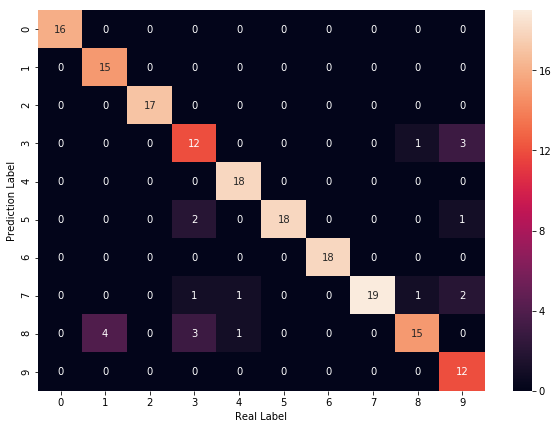

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:71 index:[5] real:5
#1 min_error:81 index:[2] real:2
#2 min_error:88 index:[8] real:8
#3 min_error:16 index:[0] real:0
#4 min_error:73 index:[1] real:1
#5 min_error:65 index:[7] real:7
#6 min_error:57 index:[6] real:6
#7 min_error:62 index:[3] real:3
#8 min_error:53 index:[2] real:2
#9 min_error:73 index:[1] real:1
#10 min_error:93 index:[7] real:7
#11 min_error:96 index:[7] real:4
#12 min_error:60 index:[6] real:6
#13 min_error:71 index:[3] real:3
#14 min_error:75 index:[1] real:1
#15 min_error:82 index:[3] real:3
#16 min_error:82 index:[7] real:9
#17 min_error:78 index:[1] real:1
#18 min_error:90 index:[7] real:7
#19 min_error:38 index:[6] real:6
#20 min_error:81 index:[8] real:8
#21 min_error:55 index:[4] real:4
#22 min_error:64 index:[3] real:3
#23 min_error:80 index:[1] real:1
#24 min_error:53 index:[4] real:4
#25 min_error:45 index:[0] real:0
#26 min_error:54 index:[5] real:5
#27 min_error:58 index:[3] real:3
#28 min_error:77 index:[6] real:6
#29 min_error:91 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9047619047619048
Avg Base Learner:0.7761533704390847


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.22777777777777777
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.43333333333333335
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6111111111111112
Accur

Accuracy on training set: 0.8388888888888889
Accuracy on training set: 0.8444444444444444
Accuracy on training set: 0.85
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8333333333333334
Accuracy on training set: 0.85
Accuracy on training set: 0.85
Accuracy on training set: 0.85
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8666666666666667
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8722222222222222
Accuracy on training set: 0.8555555555555555
Accuracy on training set: 0.8611111111111112
Accuracy on training set: 0.8666666666666667
Accuracy on training set: 0.8777777777777778
Accuracy on training 

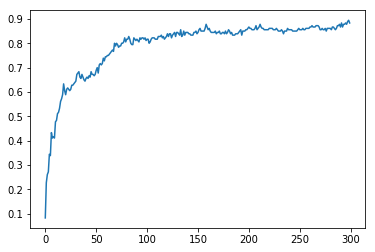

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.08333333333333333,
 0.22777777777777777,
 0.2611111111111111,
 0.2722222222222222,
 0.34444444444444444,
 0.3388888888888889,
 0.43333333333333335,
 0.4111111111111111,
 0.4166666666666667,
 0.4111111111111111,
 0.4777777777777778,
 0.48333333333333334,
 0.5111111111111111,
 0.5166666666666667,
 0.5333333333333333,
 0.5611111111111111,
 0.5722222222222222,
 0.5888888888888889,
 0.6333333333333333,
 0.6055555555555555,
 0.5888888888888889,
 0.6111111111111112,
 0.6166666666666667,
 0.6111111111111112,
 0.6055555555555555,
 0.6111111111111112,
 0.6277777777777778,
 0.6277777777777778,
 0.6333333333333333,
 0.6388888888888888,
 0.6444444444444445,
 0.6722222222222223,
 0.6777777777777778,
 0.6833333333333333,
 0.6611111111111111,
 0.6555555555555556,
 0.6722222222222223,
 0.6611111111111111,
 0.65,
 0.6444444444444445,
 0.6555555555555556,
 0.6611111111111111,
 0.6555555555555556,
 0.6666666666666666,
 0.6611111111111111,
 0.6833333333333333,
 0.6722222222222223,
 0.6722222222222223,
 